In [2]:
import sys
from os import path
sys.path.append("..")

In [3]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [4]:
data = io.loadmat("../data/g50c.mat")
data.keys()
X = data['X'].astype(np.double)
y = data['y'].astype(np.double)
y = y.reshape(y.shape[0])

X, y = shuffle(X, y, random_state=0)

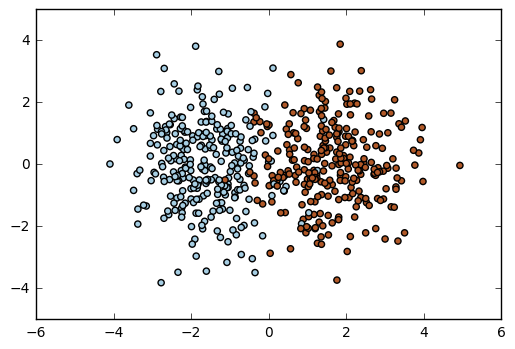

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

In [12]:
from svm.svm_custom import SVM

mysvm = SVM(C=10, kernel='linear', gamma=0.5)
num = 50
mysvm.fit(X[:num], y[:num])
mysvm.score(X, y)

     pcost       dcost       gap    pres   dres
 0:  1.9803e+01 -1.5331e+03  4e+03  4e-01  1e-14
 1:  2.4408e+01 -2.6472e+02  5e+02  4e-02  1e-14
 2:  1.1115e+01 -1.8573e+01  3e+01  4e-04  2e-14
 3:  1.1127e+00 -2.9252e+00  4e+00  2e-16  3e-15
 4: -1.6029e-01 -6.9589e-01  5e-01  2e-16  2e-15
 5: -2.8135e-01 -3.3943e-01  6e-02  2e-16  5e-16
 6: -3.0178e-01 -3.0861e-01  7e-03  1e-16  4e-16
 7: -3.0451e-01 -3.0486e-01  3e-04  2e-16  6e-16
 8: -3.0466e-01 -3.0468e-01  1e-05  2e-16  5e-16
 9: -3.0467e-01 -3.0467e-01  3e-07  2e-16  6e-16
Optimal solution found.


0.90909090909090906

In [13]:
from svm.svm_custom import SVM_SGD

mysgd = SVM_SGD(eta0=0.25, alpha=0.1)
mysgd.fit(X[:num], y[:num])
mysgd.score(X,y)

0.88727272727272721

In [16]:
from svm.s3vm_fp import S3VM_SGD_FP

s3vm = S3VM_SGD_FP(knn=1, eta0=0.25, alpha=0.1, kernel='linear')
s3vm.fit(X[:num], y[:num], X[num:])
s3vm.score(X,y)

0.83090909090909093

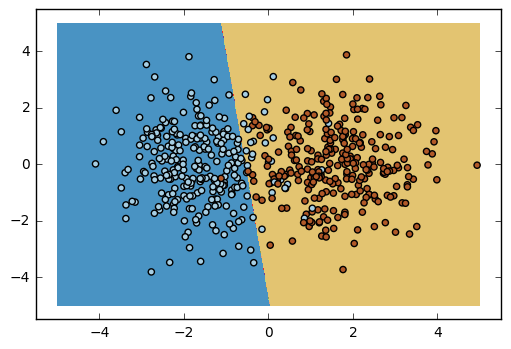

In [9]:
# Generate grid along first two principal components
multiples = np.arange(-5, 5, 0.01)
# steps along first component
first = multiples[:, np.newaxis] * pca.components_[0, :]
# steps along second component
second = multiples[:, np.newaxis] * pca.components_[1, :]
# combine
grid = first[np.newaxis, :, :] + second[:, np.newaxis, :]
flat_grid = grid.reshape(-1, X.shape[1])

Z = s3vm.predict(flat_grid)

# Put the result into a color plot
Z = Z.reshape(grid.shape[:-1])
plt.contourf(multiples, multiples, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()